In [29]:
%matplotlib inline
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

#Read relevant files
python_groups = pd.read_csv('Python_Meetup_Data.csv')
python_groups.drop(['Unnamed: 0', 'created_date', 'last_event', 'next_event', 'primary_topic', 'membership_fees'], axis = 1, inplace = True)
sanfran_santafe_groups = pd.read_csv('SanFran_SantaFe_Meetup_Data.csv')
sanfran_santafe_groups.drop(['Unnamed: 0', 'created_date', 'last_event', 'next_event', 'primary_topic', 'membership_fees'], axis = 1, inplace = True)


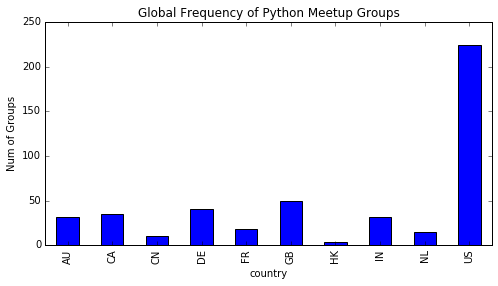

In [30]:
#Find global distribution of Python groups
python_groups = python_groups.sort_values(by = ['members', 'ratings'], ascending = [False, False])
python_groups_by_country = python_groups.groupby('country').country.count()
fig = plt.figure(figsize = (8, 4))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Country')
ax1.set_ylabel('Num of Groups')
ax1.set_title("Global Frequency of Python Meetup Groups")
python_groups_by_country.plot(kind='bar')


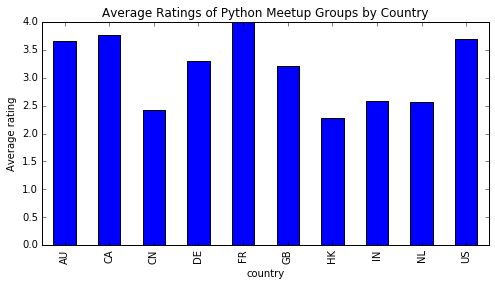

In [31]:
#Plot average member count across Python groups around the globe
python_ratings_by_country = python_groups.groupby('country').ratings.sum() / python_groups.groupby('country').ratings.count()
fig = plt.figure(figsize = (8, 4))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Country')
ax1.set_ylabel('Average rating')
ax1.set_title('Average Ratings of Python Meetup Groups by Country')
python_ratings_by_country.plot(kind='bar')


In [32]:
#Find top 5 Python groups in different countries based on number of members and ratings
python_groups=python_groups.sort_values(by = ['members', 'ratings'], ascending=[False,False])
print python_groups.groupby('country').head(5)

                                          group_name           city country  \
112                             Hackers and Founders  Mountain View      US   
33                                 Designers + Geeks  San Francisco      US   
46                                 Women Who Code SF  San Francisco      US   
114            Google Developer Group Silicon Valley  Mountain View      US   
29                 San Francisco Python Meetup Group  San Francisco      US   
318  VanDev: Vancouver's Software Developers Network      Vancouver      CA   
271        BangPypers - Bangalore Python Users Group      Bangalore      IN   
396                                  Big Data, Paris          Paris      FR   
352                             PyData London Meetup         London      GB   
225                         Melbourne Web Developers      Melbourne      AU   
348                            Women Who Code London         London      GB   
337                   The London Python Group - TLPG

In [33]:
#Plot total number of groups in San Francisco vs Santa Fe by category
from pylab import *

sanfran_groups = sanfran_santafe_groups.loc[sanfran_santafe_groups['city'] == 'San Francisco']
santafe_groups = sanfran_santafe_groups.loc[sanfran_santafe_groups['city'] == 'Santa Fe']

top5_sanfran = sanfran_groups['category'].value_counts().head(5)
top5_santafe = santafe_groups['category'].value_counts().head(5)

sanfran_labels = list(top5_sanfran.index)
santafe_labels = list(top5_santafe.index)

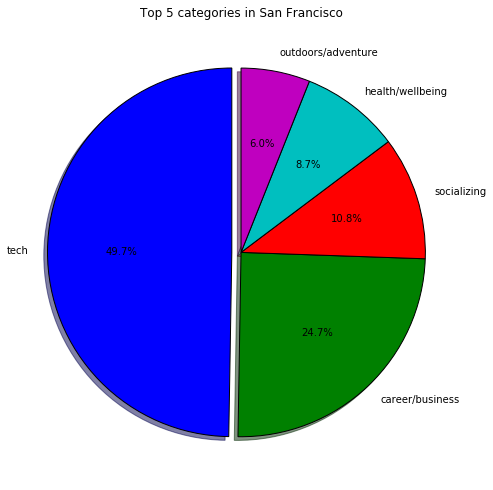

In [34]:
figure(figsize=(8,8))
ax = axes([0.1, 0.1, 0.8, 0.8])
explode = (0.05, 0, 0, 0, 0)
pie(list(top5_sanfran.values), explode = explode, labels = sanfran_labels, autopct = '%1.1f%%', shadow = True, startangle = 90)

title('Top 5 categories in San Francisco')
show()

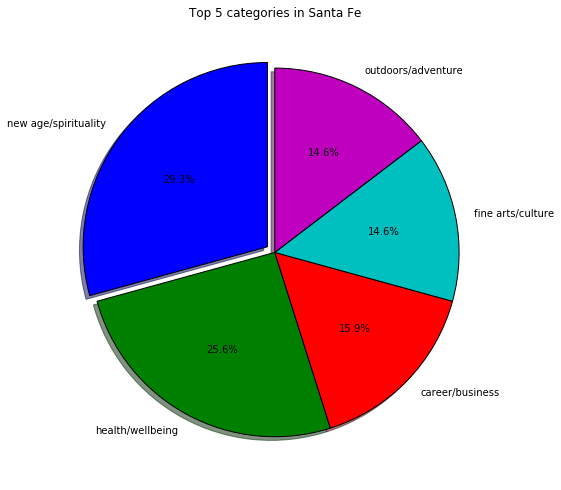

In [35]:
figure(figsize=(8,8))
ax = axes([0.1, 0.1, 0.8, 0.8])
explode = (0.05, 0, 0, 0, 0)
pie(list(top5_santafe.values), explode = explode, labels = santafe_labels, autopct = '%1.1f%%', shadow = True, 
    startangle = 90)

title('Top 5 categories in Santa Fe')
show()